<a href="https://colab.research.google.com/github/YuxuanHuang455/PS-Microexpression/blob/main/Explanation_NLP_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I Query Literature:


Retrieve scholarly articles related to "blockchain" and "machine learning" or "web3" and "AI," and store their metadata in a pandas DataFrame.

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm
import time

def fetch_arxiv_data(query, max_results=100):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    import xml.etree.ElementTree as ET
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = published.split('-')[0]
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': int(year),
            'venue': venue
        })
    return entries

queries = ['Microexpression', 'prediction']

all_entries = []

for query in queries:
    print(f"Fetching data for query: {query}")
    response = fetch_arxiv_data(query)
    entries = parse_arxiv_response(response)
    all_entries.extend(entries)
    time.sleep(3)  # To respect arXiv's rate limits

df = pd.DataFrame(all_entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
df.head()

Fetching data for query: Microexpression
Fetching data for query: prediction
Data saved to literature_data.csv


title  \
0  Micro-expression Action Unit Detection with Sp...   
1  Shallow Optical Flow Three-Stream CNN for Macr...   
2  PersonalityScanner: Exploring the Validity of ...   
3  Lagrangian Motion Magnification with Double Sp...   
4  Efficient Neural Architecture Search for Emoti...   

                                            abstract  year venue  
0    Action Unit (AU) detection plays an importan...  2019   N/A  
1    Facial expressions vary from the visible to ...  2021   N/A  
2    Human cognition significantly influences exp...  2024   N/A  
3    Microexpressions are fast and spatially smal...  2022   N/A  
4    Automated human emotion recognition from fac...  2023   N/A

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm
import time

def fetch_arxiv_data(query, max_results=100):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    import xml.etree.ElementTree as ET
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = published.split('-')[0]
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': int(year),
            'venue': venue
        })
    return entries

# Interactive input for query
query = input("Enter your query for arXiv search (e.g., blockchain AND sustainability): ")

print(f"Fetching data for query: {query}")
response = fetch_arxiv_data(query)
entries = parse_arxiv_response(response)

# Create a DataFrame and save to CSV
df = pd.DataFrame(entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
print("Here are the first few results:")
print(df.head())


Enter your query for arXiv search (e.g., blockchain AND sustainability): microexpression AND prediction
Fetching data for query: microexpression AND prediction
Data saved to literature_data.csv
Here are the first few results:
                                               title  \
0  Shallow Optical Flow Three-Stream CNN for Macr...   

                                            abstract  year venue  
0    Facial expressions vary from the visible to ...  2021   N/A  


# Part II Natural Language Processing (NLP) Analysis

Perform analyses such as word cloud generation and sentiment analysis on the collected abstracts.

## a. Word Cloud Generation
Visualize the most frequent words in the abstracts.

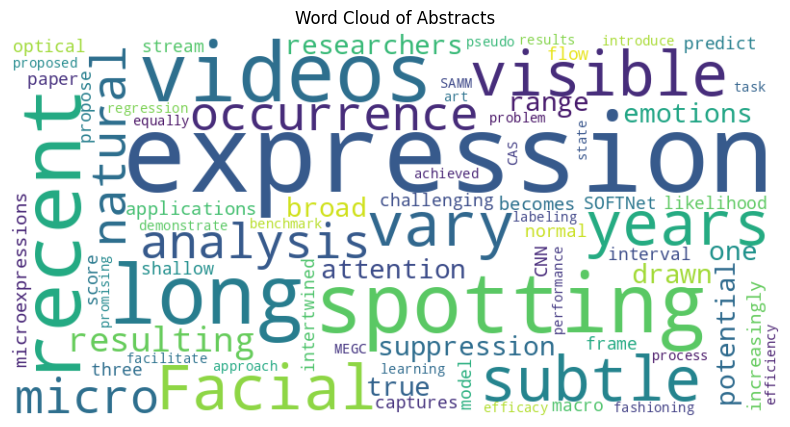

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all abstracts into a single string
text = ' '.join(df['abstract'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts')
plt.show()


## b. Sentiment Analysis
Analyze the sentiment of each abstract using the TextBlob library.

             abstract sentiment_category  sentiment_polarity
0    This is amazing!           Positive                0.75
1  I don't like this.            Neutral                0.00
2          It's okay.           Positive                0.50
3                None                NaN                 NaN


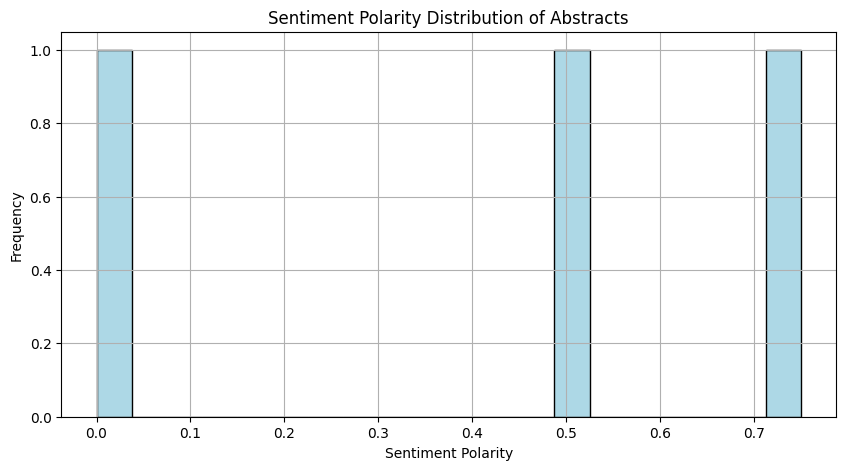

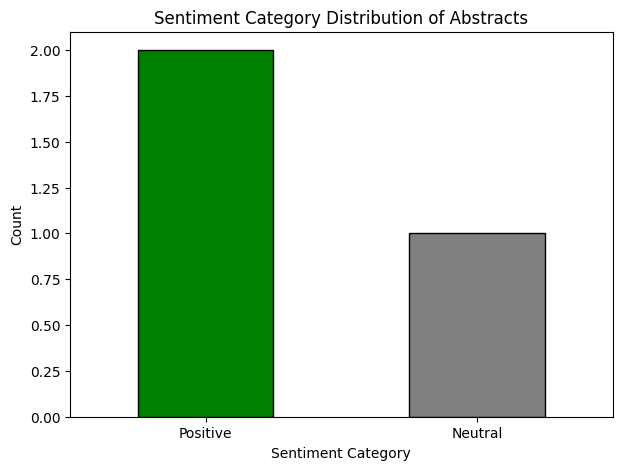

In [ ]:
# Import necessary libraries
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Improved sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Example DataFrame with abstracts (Replace with your data)
data = {'abstract': ["This is amazing!", "I don't like this.", "It's okay.", None]}
df = pd.DataFrame(data)

# Apply sentiment analysis to the abstracts
df['sentiment_category'] = df['abstract'].dropna().apply(analyze_sentiment)

# Calculate sentiment polarity scores for histogram
df['sentiment_polarity'] = df['abstract'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the results
print(df[['abstract', 'sentiment_category', 'sentiment_polarity']])

# Plot the sentiment distribution
plt.figure(figsize=(10, 5))
df['sentiment_polarity'].hist(bins=20, edgecolor='black', color='lightblue')
plt.title('Sentiment Polarity Distribution of Abstracts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot sentiment category distribution
plt.figure(figsize=(7, 5))
df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'], edgecolor='black')
plt.title('Sentiment Category Distribution of Abstracts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## c. Network Visualization
Visualize relationships between key terms in the abstracts using NetworkX and matplotlib.

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm
import time

def fetch_arxiv_data(query, max_results=100):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    import xml.etree.ElementTree as ET
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = published.split('-')[0]
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': int(year),
            'venue': venue
        })
    return entries

# Interactive input for query
query = input("Enter your query for arXiv search (e.g., blockchain AND sustainability): ")

print(f"Fetching data for query: {query}")
response = fetch_arxiv_data(query)
entries = parse_arxiv_response(response)

# Create a DataFrame and save to CSV
df = pd.DataFrame(entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
print("Here are the first few results:")
print(df.head())


Enter your query for arXiv search (e.g., blockchain AND sustainability): micro AND expression
Fetching data for query: micro AND expression
Data saved to literature_data.csv
Here are the first few results:
                                               title  \
0  Spontaneous Facial Micro-Expression Recognitio...   
1  Micro-Expression Recognition Based on Attribut...   
2  An Overview of Facial Micro-Expression Analysi...   
3  Adaptive Temporal Motion Guided Graph Convolut...   
4  Feature refinement: An expression-specific fea...   

                                            abstract  year venue  
0    Recently, there are increasing interests in ...  2016   N/A  
1    Facial micro-expressions recognition has att...  2022   N/A  
2    Facial micro-expressions indicate brief and ...  2020   N/A  
3    Micro-expressions serve as essential cues fo...  2024   N/A  
4    Micro-Expression Recognition has become chal...  2021   N/A  


In [ ]:
print(df['abstract'].head())  # Ensure this column exists and has data
print(df['abstract'].isna().sum())  # Check for NaN values

0      Recently, there are increasing interests in ...
1      Facial micro-expressions recognition has att...
2      Facial micro-expressions indicate brief and ...
3      Micro-expressions serve as essential cues fo...
4      Micro-Expression Recognition has become chal...
Name: abstract, dtype: object
0


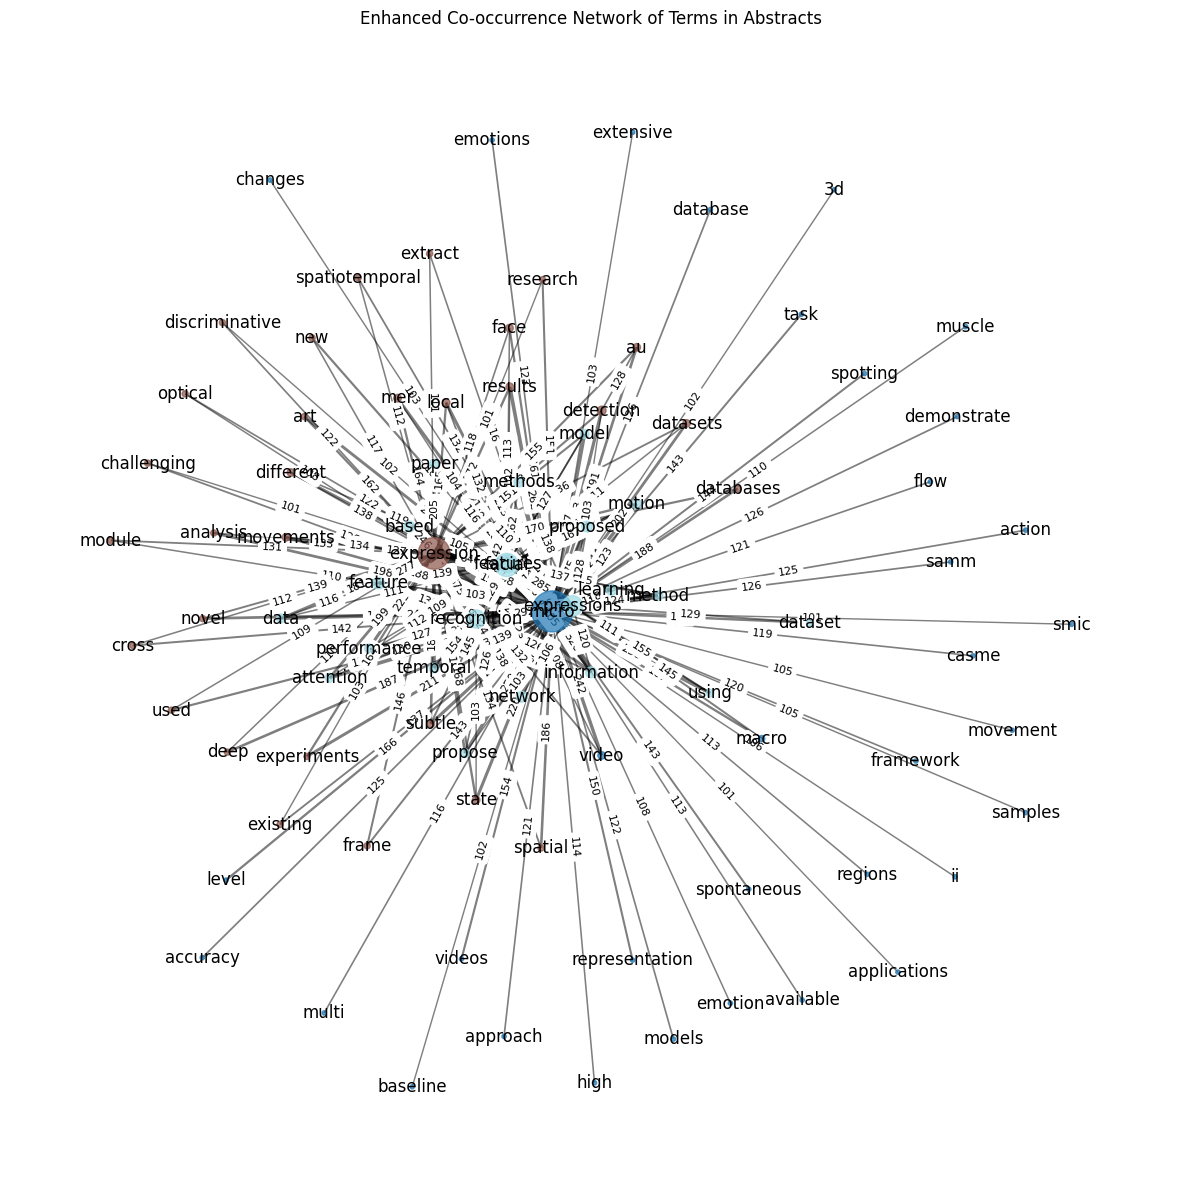

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Tokenize and create a co-occurrence matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['abstract'].dropna())
Xc = (X.T * X)  # Co-occurrence matrix
Xc.setdiag(0)  # Set diagonal to zero

# Create graph from co-occurrence matrix
G = nx.from_scipy_sparse_array(Xc)

# Map indices to words
terms = vectorizer.get_feature_names_out()
mapping = {i: terms[i] for i in range(len(terms))}
G = nx.relabel_nodes(G, mapping)

# Filter edges by weight (co-occurrence count)
threshold = 100  # Adjust this threshold based on your dataset
edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] > threshold]
H = nx.Graph()
H.add_edges_from(edges)

# Compute node degrees
degrees = dict(H.degree())

# Detect communities
communities = community.greedy_modularity_communities(H)
community_map = {}
for i, com in enumerate(communities):
    for name in com:
        community_map[name] = i

# Assign colors to communities
colors = [community_map[node] for node in H.nodes()]

# Draw the network
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)  # Seed for reproducibility

# Draw nodes with sizes proportional to degree
nx.draw_networkx_nodes(H, pos,
                       node_size=[degrees[node] * 10 for node in H.nodes()],
                       node_color=colors,
                       cmap=plt.cm.tab20,
                       alpha=0.7)

# Draw edges with widths proportional to weight
nx.draw_networkx_edges(H, pos,
                       width=[d['weight'] * 0.01 for (u, v, d) in H.edges(data=True)],
                       alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(H, pos, font_size=12, font_color='black')

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in H.edges(data=True)}
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=8)

plt.title('Enhanced Co-occurrence Network of Terms in Abstracts')
plt.axis('off')
plt.show()


Network Visualization:

- **Co-occurrence Network Construction**: We employed the CountVectorizer from scikit-learn to tokenize the abstracts and create a term-document matrix. By computing the co-occurrence matrix, we identified pairs of terms that
- **Graph Creation and Enhancement:** Using NetworkX, we constructed a graph where nodes represented terms, and edges indicated co-occurrence relationships. To enhance the visualization:

 - **Node Sizing**: Nodes were sized proportionally to their degree, emphasizing terms with more connections.
 - **Community Detection**: We applied the greedy modularity algorithm to detect communities within the network, assigning distinct colors to each cluster to highlight related groups of terms.
 - **Edge Weighting**: Edge widths were adjusted based on co-occurrence frequency, underscoring stronger associations between terms.



### Centrality Measures: Identify the most influential terms in the network using centrality measures.

Top terms by degree centrality: ['micro', 'expression', 'facial', 'expressions', 'recognition', 'features', 'feature', 'based', 'network', 'learning']


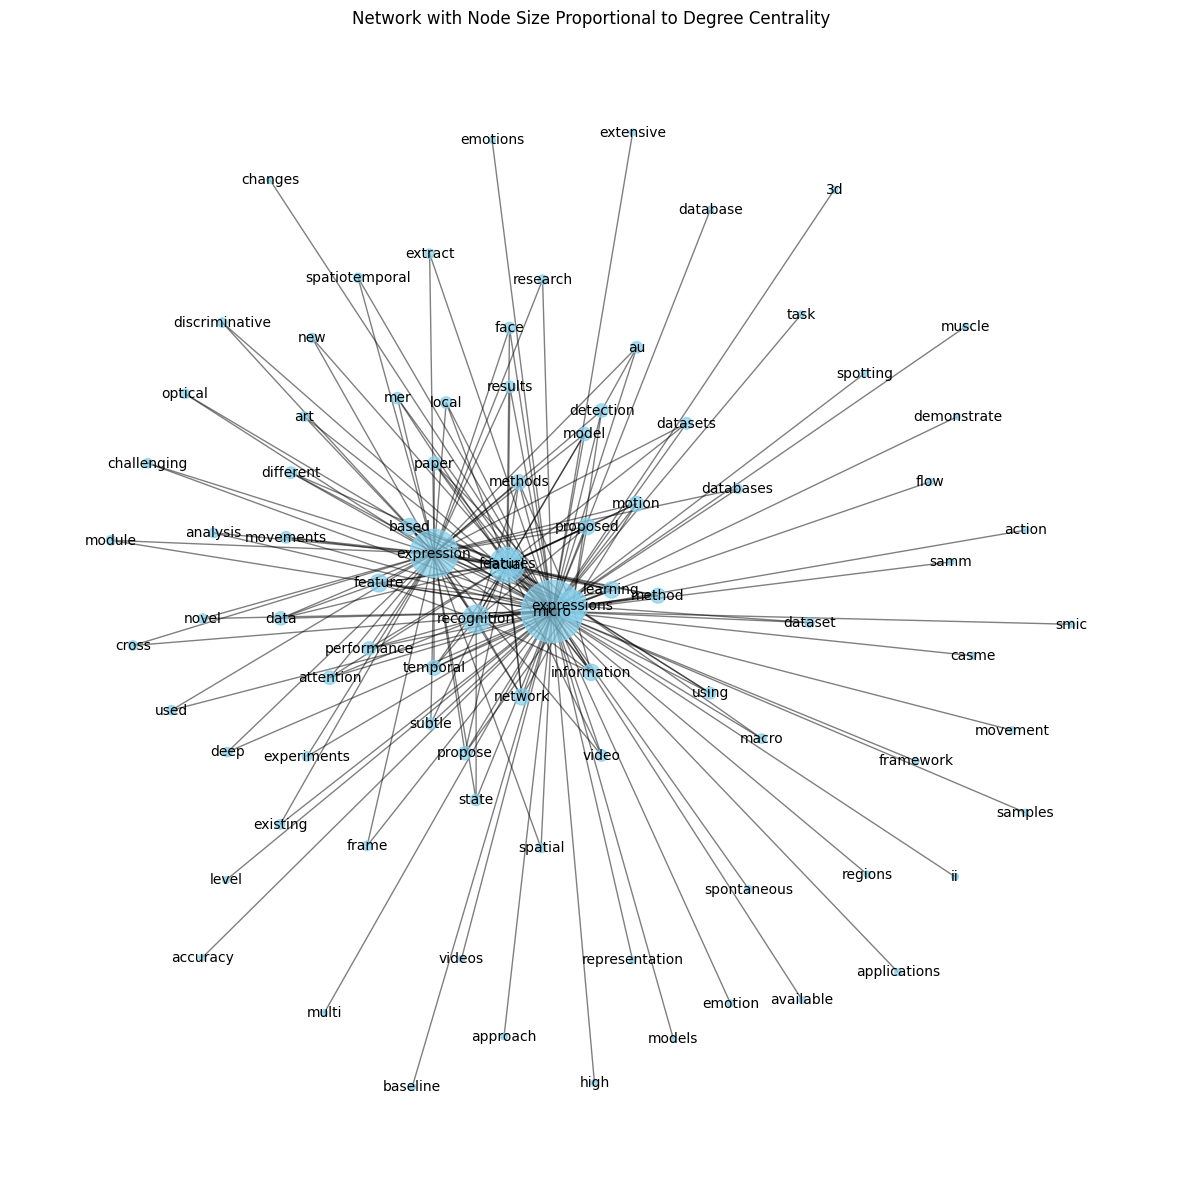

In [ ]:
# Calculate different centrality measures
degree_centrality = nx.degree_centrality(H)
betweenness_centrality = nx.betweenness_centrality(H)
closeness_centrality = nx.closeness_centrality(H)

# Highlight top terms based on degree centrality
top_terms = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top terms by degree centrality:", [term for term, centrality in top_terms])

# Draw the network with node size proportional to degree centrality
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos,
                       node_size=[degree_centrality[node] * 2000 for node in H.nodes()],
                       node_color='skyblue',
                       alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network with Node Size Proportional to Degree Centrality')
plt.axis('off')
plt.show()


### Clustering Coefficient Analysis: Investigate the local clustering of terms.

Nodes with high clustering coefficients: ['analysis', 'art', 'attention', 'au', 'detection', 'based', 'challenging', 'cross', 'data', 'feature', 'databases', 'dataset', 'datasets', 'deep', 'different', 'discriminative', 'existing', 'experiments', 'model', 'frame', 'video', 'optical', 'module', 'motion', 'research', 'mer', 'movements', 'methods', 'network', 'learning', 'performance', 'proposed', 'results', 'state', 'method', 'new', 'novel', 'extract', 'temporal', 'spatial', 'propose', 'paper', 'face', 'information', 'local', 'spatiotemporal', 'used', 'subtle', 'using', 'macro']


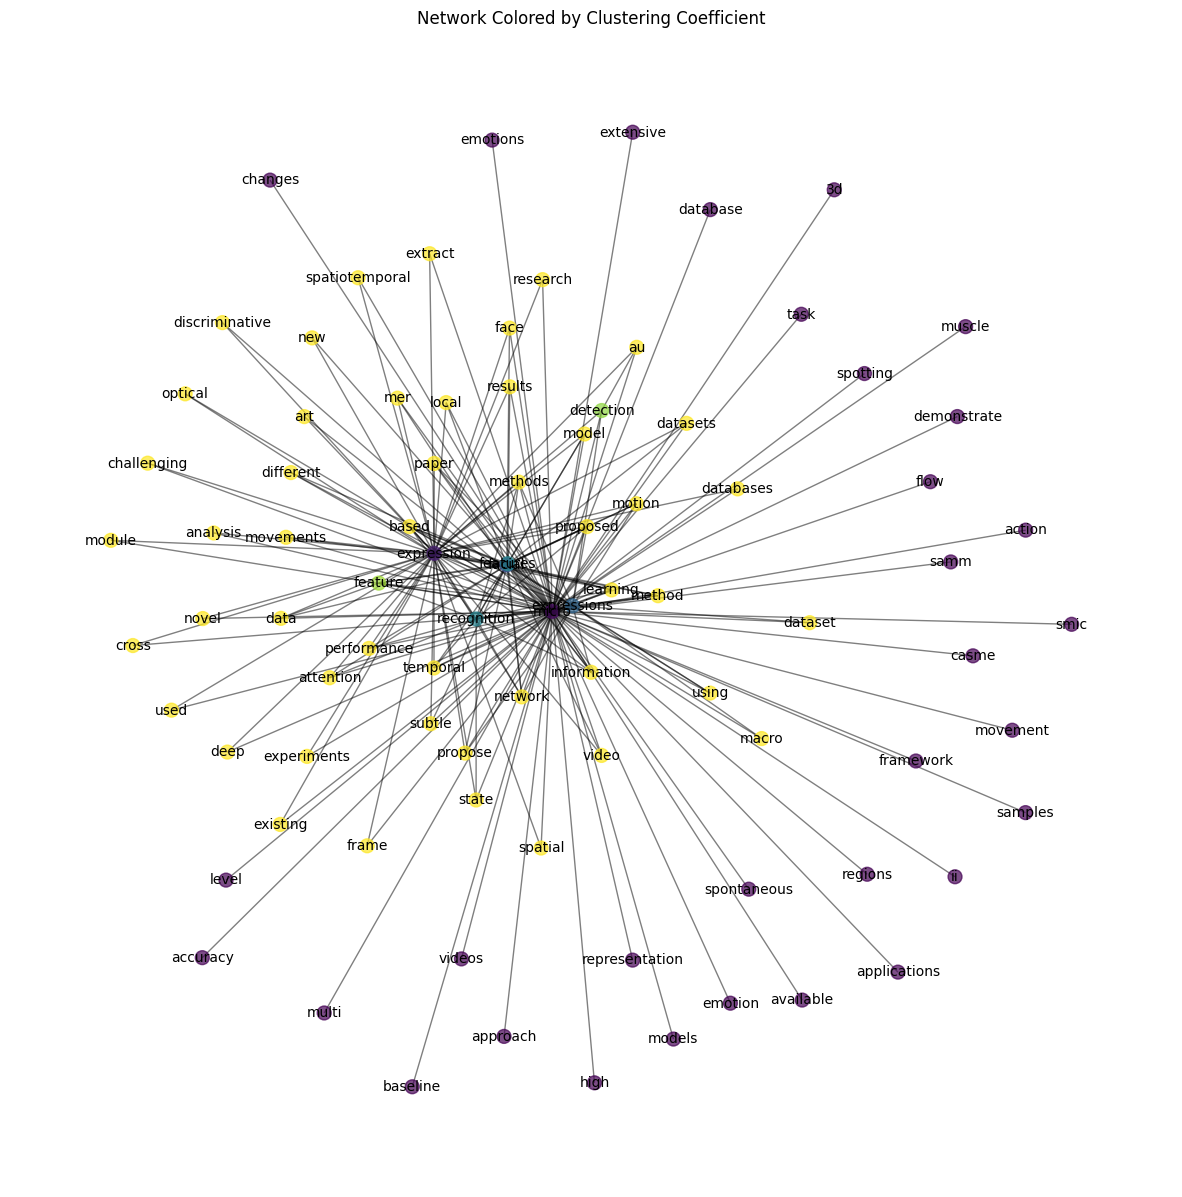

In [ ]:
# Calculate the clustering coefficient for each node
clustering_coefficients = nx.clustering(H)

# Highlight nodes with high clustering coefficients
high_clustering_nodes = [node for node, coeff in clustering_coefficients.items() if coeff > 0.5]
print("Nodes with high clustering coefficients:", high_clustering_nodes)

# Draw the network with nodes colored by clustering coefficient
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos,
                       node_size=100,
                       node_color=[clustering_coefficients[node] for node in H.nodes()],
                       cmap=plt.cm.viridis,
                       alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network Colored by Clustering Coefficient')
plt.axis('off')
plt.show()


## Eigenvector Centrality: Highlight nodes based on their influence in the network.

Top terms by eigenvector centrality: ['micro', 'expression', 'facial', 'expressions', 'recognition', 'features', 'feature', 'based', 'network', 'learning']


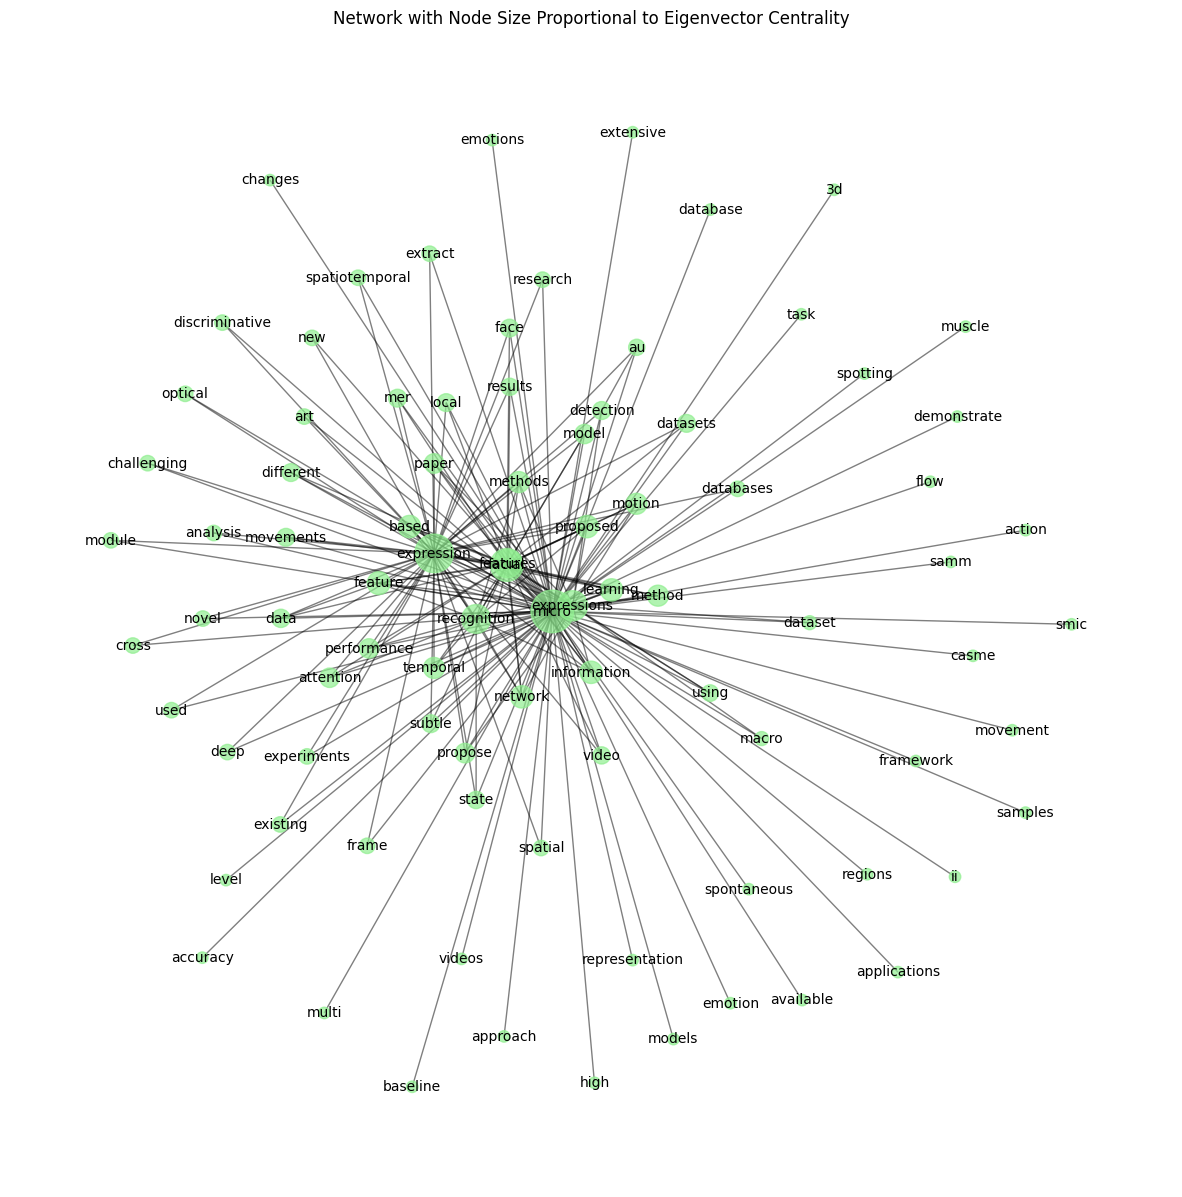

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(H)

# Highlight top terms by eigenvector centrality
top_eigenvector_terms = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top terms by eigenvector centrality:", [term for term, centrality in top_eigenvector_terms])

# Draw the network with node size proportional to eigenvector centrality
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos,
                       node_size=[eigenvector_centrality[node] * 2000 for node in H.nodes()],
                       node_color='lightgreen',
                       alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network with Node Size Proportional to Eigenvector Centrality')
plt.axis('off')
plt.show()


## Core-Periphery Analysis: Identify core and peripheral nodes in the network.

Core nodes: ['micro', 'expression', 'recognition', 'facial', 'based', 'features', 'expressions', 'feature', 'network', 'learning', 'proposed', 'information']


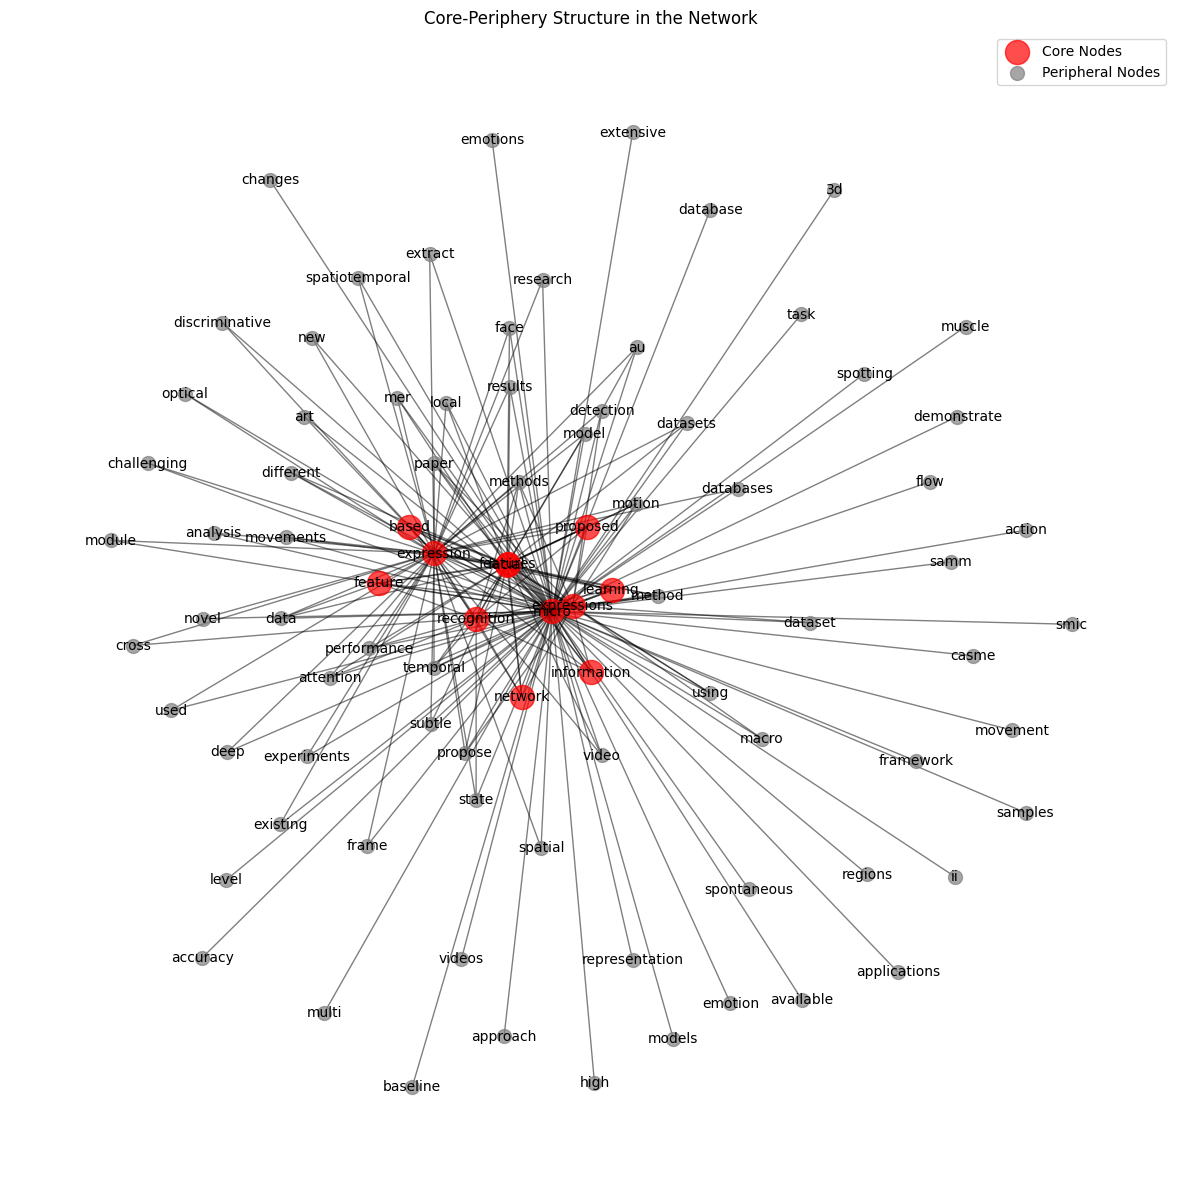

In [ ]:
# Perform a core-periphery analysis
core_number = nx.core_number(H)

# Highlight core nodes
max_core = max(core_number.values())
core_nodes = [node for node, core in core_number.items() if core == max_core]
print("Core nodes:", core_nodes)

# Draw the network with core nodes highlighted
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos,
                       nodelist=core_nodes,
                       node_size=300,
                       node_color='red',
                       alpha=0.7,
                       label='Core Nodes')
nx.draw_networkx_nodes(H, pos,
                       nodelist=[node for node in H.nodes() if node not in core_nodes],
                       node_size=100,
                       node_color='grey',
                       alpha=0.7,
                       label='Peripheral Nodes')
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Core-Periphery Structure in the Network')
plt.legend()
plt.axis('off')
plt.show()


## Hierarchical Community Detection: Use hierarchical clustering to detect communities.

Shortest path between micro and expression: ['micro', 'expression']


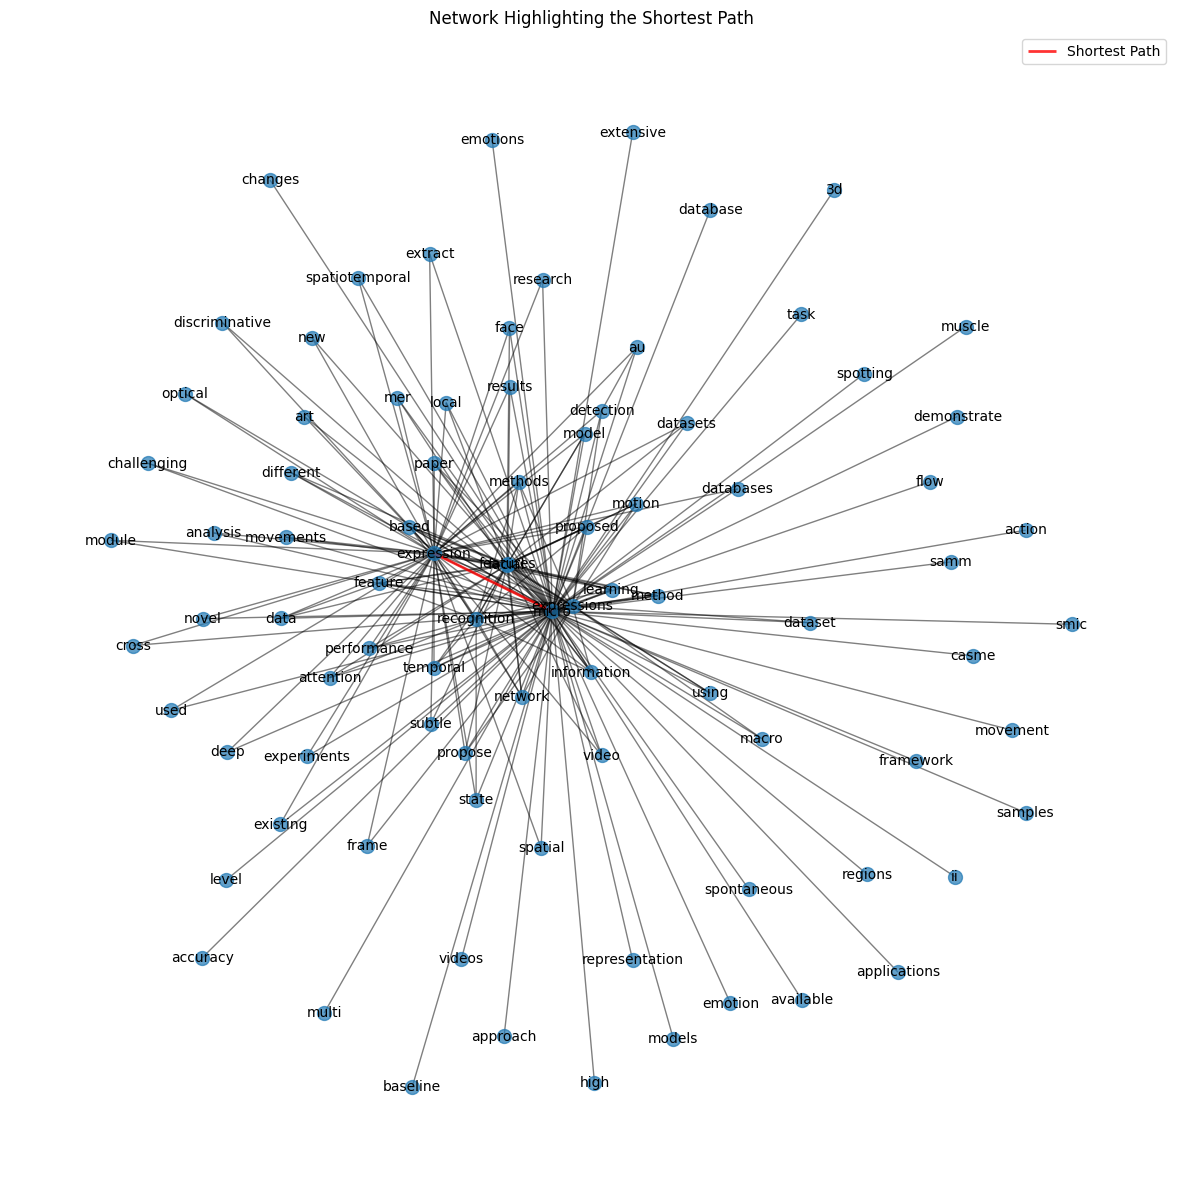

In [ ]:
# Choose two key nodes based on centrality or domain knowledge
node1, node2 = top_terms[0][0], top_terms[1][0]  # Example using top terms by degree centrality

# Find the shortest path between the selected nodes
shortest_path = nx.shortest_path(H, source=node1, target=node2)
print(f"Shortest path between {node1} and {node2}:", shortest_path)

# Draw the network highlighting the shortest path
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos, node_size=100, alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_edges(H, pos, edgelist=[(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)],
                       edge_color='red', width=2, alpha=0.8, label='Shortest Path')
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network Highlighting the Shortest Path')
plt.legend()
plt.axis('off')
plt.show()


## Shortest Path Analysis: Visualize shortest paths between key nodes.

Shortest path between micro and expression: ['micro', 'expression']


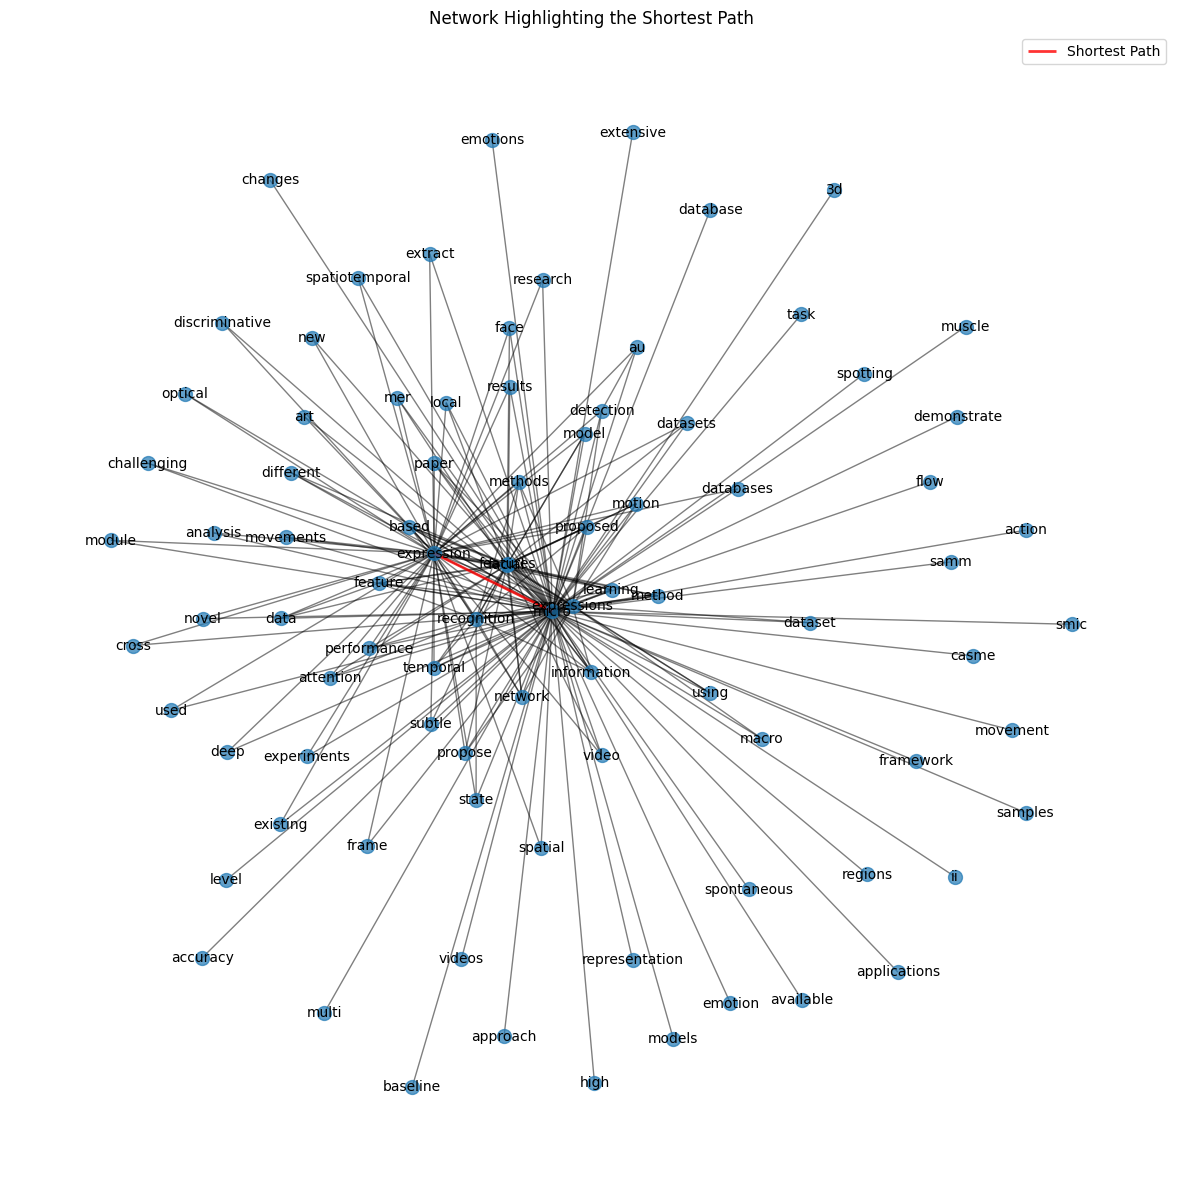

In [ ]:
# Choose two key nodes based on centrality or domain knowledge
node1, node2 = top_terms[0][0], top_terms[1][0]  # Example using top terms by degree centrality

# Find the shortest path between the selected nodes
shortest_path = nx.shortest_path(H, source=node1, target=node2)
print(f"Shortest path between {node1} and {node2}:", shortest_path)

# Draw the network highlighting the shortest path
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.15, seed=42)
nx.draw_networkx_nodes(H, pos, node_size=100, alpha=0.7)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_edges(H, pos, edgelist=[(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)],
                       edge_color='red', width=2, alpha=0.8, label='Shortest Path')
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Network Highlighting the Shortest Path')
plt.legend()
plt.axis('off')
plt.show()


# Part III: More on NLP Analysis

In [ ]:
!pip install pandas transformers sentence-transformers scikit-learn matplotlib


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the abstracts
embeddings = model.encode(df['abstract'].tolist())

# Number of clusters for topic modeling
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(embeddings)
df['topic'] = kmeans.labels_

# Display the topics
for i in range(1,num_clusters):
    print(f"Topic {i}:")
    print(df[df['topic'] == i]['abstract'].tolist())
    print()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topic 1:
["  Owing to their ability to confine electromagnetic energy in ultrasmall\ndielectric volumes, micro-disk, ring and toroid resonators hold interest for\nboth specific applications and fundamental investigations. Generally,\ncontributions from various loss channels within these devices lead to limited\nspectral windows (Q-bands) where highest mode Q-factors manifest. Here we\ndescribe a strategy for tuning Q-bands using a new class of micro-resonators,\nnamed micro-kylix resonators, in which engineered stress within an initially\nflat disk results in either concave or convex devices. To shift the Q-band by\n60nm towards short wavelengths in flat micro-disks a 50% diameter reduction is\nrequired, which causes severe radiative losses suppressing Q's. With a\nmicro-kylix, we achieve similar tuning and even higher Q's by two orders of\nmagnitude smaller diameter modification (0.4%). The phenomenon relies on\ngeometry-induced smart interplay between modified dispersions of material

In [ ]:
!pip install tqdm


In [ ]:
from transformers import pipeline
from tqdm import tqdm

# Initialize the summarization pipeline
summarizer = pipeline('summarization', model='facebook/bart-large-cnn')

# Only summarize the first 5 abstracts
df_test = df.head(5)

# Apply summarization with a progress bar
summaries = []
for abstract in tqdm(df_test['abstract'], desc="Summarizing Abstracts (Test)"):
    summary = summarizer(abstract, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
    summaries.append(summary)

# Add summaries to the test DataFrame
df_test['summary'] = summaries

# Display original abstracts and their summaries
for idx, row in df_test.iterrows():
    print(f"Original Abstract: {row['abstract']}")
    print(f"Summary: {row['summary']}")
    print()


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Summarizing Abstracts (Test): 100%|██████████| 5/5 [01:50<00:00, 22.05s/it]

Original Abstract:   Recently, there are increasing interests in inferring mirco-expression from
facial image sequences. Due to subtle facial movement of micro-expressions,
feature extraction has become an important and critical issue for spontaneous
facial micro-expression recognition. Recent works usually used spatiotemporal
local binary pattern for micro-expression analysis. However, the commonly used
spatiotemporal local binary pattern considers dynamic texture information to
represent face images while misses the shape attribute of face images. On the
other hand, their works extracted the spatiotemporal features from the global
face regions, which ignore the discriminative information between two
micro-expression classes. The above-mentioned problems seriously limit the
application of spatiotemporal local binary pattern on micro-expression
recognition. In this paper, we propose a discriminative spatiotemporal local
binary pattern based on an improved integral projection to resolve


/tmp/ipython-input-3478440022.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['summary'] = summaries


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
Analyzing Sentiment on Summaries: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
/tmp/ipython-input-2351004068.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentiment'] = sentiments


Summary: Due to subtle facial movement of micro-expressions, feature extraction has become an important and critical issue for spontaneous facial recognition. Recent works usually used spatiotemporal local binary pattern for micro-expression analysis. We propose a discrimin
Sentiment: POSITIVE

Summary: Micro-expressions have the characteristics of short duration and low intensity. It is difficult to train a high-performance classifier with the limited number of micro-expression. We propose a micro-expression recognition method based on attribute information
Sentiment: NEGATIVE

Summary: Micro-expressionrecognition (MER) has drawn much attention because it can benefit a wide range of applications, e.g. police interrogation, clinical diagnosis, depressionanalysis, and business negotiation. In comparison to macro-expressions,
Sentiment: POSITIVE

Summary: Micro-expressions serve as essential cues for understanding individuals' genuine emotional states. The intricate and transient nature 

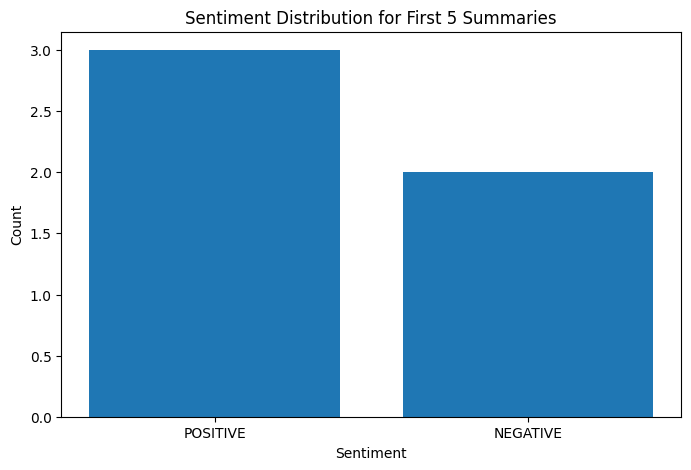

In [ ]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Apply sentiment analysis on summaries with a progress bar
sentiments = []
for summary in tqdm(df_test['summary'], desc="Analyzing Sentiment on Summaries"):
    sentiment = sentiment_analyzer(summary)[0]['label']
    sentiments.append(sentiment)

# Add sentiments to the test DataFrame
df_test['sentiment'] = sentiments

# Display summaries with their sentiment
for idx, row in df_test.iterrows():
    print(f"Summary: {row['summary']}")
    print(f"Sentiment: {row['sentiment']}")
    print()

# Visualization: Bar chart of sentiment distribution
sentiment_counts = df_test['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for First 5 Summaries')
plt.show()


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
Extracting Entities: 100%|██████████| 5/5 [00:17<00:00,  3.60s/it]

Abstract:   Recently, there are increasing interests in inferring mirco-expression from
facial image sequences. Due to subtle facial movement of micro-expressions,
feature extraction has become an important and critical issue for spontaneous
facial micro-expression recognition. Recent works usually used spatiotemporal
local binary pattern for micro-expression analysis. However, the commonly used
spatiotemporal local binary pattern considers dynamic texture information to
represent face images while misses the shape attribute of face images. On the
other hand, their works extracted the spatiotemporal features from the global
face regions, which ignore the discriminative information between two
micro-expression classes. The above-mentioned problems seriously limit the
application of spatiotemporal local binary pattern on micro-expression
recognition. In this paper, we propose a discriminative spatiotemporal local
binary pattern based on an improved integral projection to resolve the prob


/tmp/ipython-input-1662469097.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['entities'] = entities_list


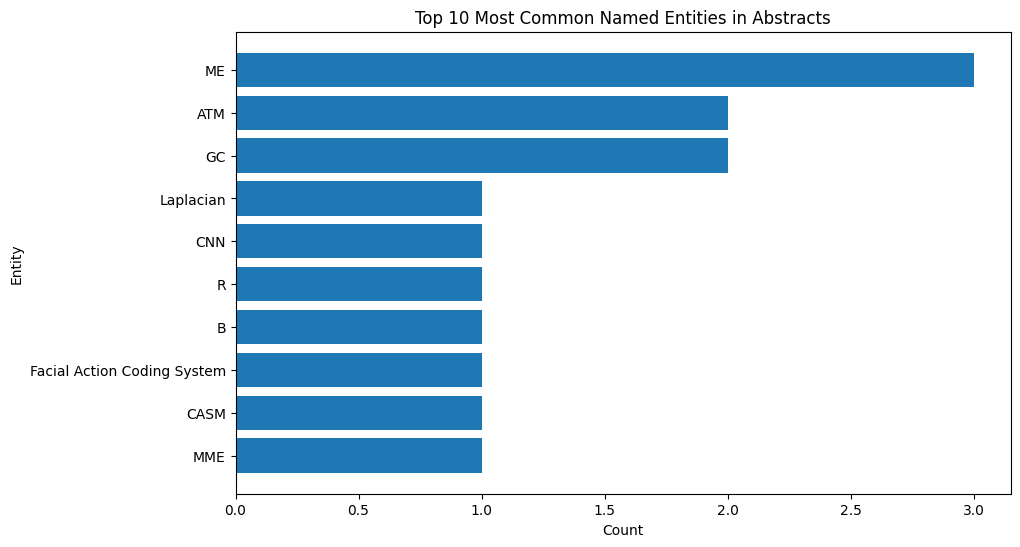

In [ ]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Initialize the NER pipeline
ner = pipeline('ner', grouped_entities=True)

# Only analyze the first 5 abstracts for testing
df_test = df.head(5)

# Apply NER with a progress bar
entities_list = []
for abstract in tqdm(df_test['abstract'], desc="Extracting Entities"):
    entities = ner(abstract)
    entities_list.append(entities)

# Add extracted entities to the test DataFrame
df_test['entities'] = entities_list

# Display abstracts with extracted entities
for idx, row in df_test.iterrows():
    print(f"Abstract: {row['abstract']}")
    print(f"Entities: {row['entities']}")
    print()

# Flatten the list of entities and count their occurrences
all_entities = [entity['word'] for entities in entities_list for entity in entities]
entity_counts = Counter(all_entities)

# Visualization: Bar chart of the most common entities
most_common_entities = entity_counts.most_common(10)
entities, counts = zip(*most_common_entities)

plt.figure(figsize=(10, 6))
plt.barh(entities, counts)
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Top 10 Most Common Named Entities in Abstracts')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Part IV More Variables from the arXiv Database

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm
import time
import xml.etree.ElementTree as ET

def fetch_arxiv_data(query, max_results=100):
    base_url = 'http://export.arxiv.org/api/query?'
    search_query = f'search_query=all:{query}&start=0&max_results={max_results}'
    response = requests.get(base_url + search_query)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

def parse_arxiv_response(response):
    root = ET.fromstring(response)
    ns = {'atom': 'http://www.w3.org/2005/Atom', 'arxiv': 'http://arxiv.org/schemas/atom'}
    entries = []
    for entry in root.findall('atom:entry', ns):
        title = entry.find('atom:title', ns).text
        abstract = entry.find('atom:summary', ns).text
        published = entry.find('atom:published', ns).text
        year = int(published.split('-')[0])
        journal_ref = entry.find('atom:journal_ref', ns)
        venue = journal_ref.text if journal_ref is not None else 'N/A'
        authors = [author.find('atom:name', ns).text for author in entry.findall('atom:author', ns)]
        doi = entry.find('arxiv:doi', ns)
        doi = doi.text if doi is not None else 'N/A'
        primary_category = entry.find('arxiv:primary_category', ns).attrib['term']
        categories = [category.attrib['term'] for category in entry.findall('atom:category', ns)]
        comments = entry.find('arxiv:comment', ns)
        comments = comments.text if comments is not None else 'N/A'
        report_number = entry.find('arxiv:report-no', ns)
        report_number = report_number.text if report_number is not None else 'N/A'
        history = [f"{event.attrib['date']} ({event.attrib['version']})" for event in entry.findall('arxiv:version', ns)]
        entries.append({
            'title': title,
            'abstract': abstract,
            'year': year,
            'venue': venue,
            'authors': authors,
            'doi': doi,
            'primary_category': primary_category,
            'categories': categories,
            'comments': comments,
            'report_number': report_number,
            'submission_history': history
        })
    return entries

queries = [' micro expression AND prediction']

all_entries = []

for query in queries:
    print(f"Fetching data for query: {query}")
    response = fetch_arxiv_data(query)
    entries = parse_arxiv_response(response)
    all_entries.extend(entries)
    time.sleep(3)  # To respect arXiv's rate limits

df = pd.DataFrame(all_entries)
df.to_csv('literature_data.csv', index=False)
print("Data saved to literature_data.csv")
df.head()


Fetching data for query:  micro expression AND prediction
Data saved to literature_data.csv


title  \
0  Feature refinement: An expression-specific fea...   
1             CMED: A Child Micro-Expression Dataset   
2  Enriched Long-term Recurrent Convolutional Net...   
3  Learning a Target Sample Re-Generator for Cros...   
4  Facial Micro-Expression Spotting and Recogniti...   

                                            abstract  year venue  \
0    Micro-Expression Recognition has become chal...  2021   N/A   
1    Micro-expressions are short bursts of emotio...  2025   N/A   
2    Facial micro-expression (ME) recognition has...  2018   N/A   
3    In this paper, we investigate the cross-data...  2017   N/A   
4    Facial micro-expressions are sudden involunt...  2019   N/A   

                                             authors  \
0  [Ling Zhou, Qirong Mao, Xiaohua Huang, Feifei ...   
1  [ Nikin~Matharaarachchi, Muhammad~Fermi Pasha,...   
2  [Huai-Qian Khor, John See, Raphael C. W. Phan,...   
3  [Yuan Zong, Xiaohua Huang, Wenming Zheng, Zhen...   
4  [Sauradip Nag, Ayan Kumar Bhunia, Aishik Konwe...   

                           doi primary_category categories  \
0                          N/A            cs.CV    [cs.CV]   
1                          N/A            cs.CV    [cs.CV]   
2                          N/A            cs.CV    [cs.CV]   
3     10.1109/TIP.2018.2797479            cs.CV    [cs.CV]   
4  10.1109/ICASSP.2019.8683737            cs.CV    [cs.CV]   

                                            comments report_number  \
0                                                N/A           N/A   
1                                                N/A           N/A   
2  Published in Micro-Expression Grand Challenge ...           N/A   
3                   To appear at ACM Multimedia 2017           N/A   
4  International Conference on Acoustics, Speech,...           N/A   

  submission_history  
0                 []  
1                 []  
2                 []  
3                 []  
4                 []

## Publication Year Distribution: A histogram can illustrate the number of papers published each year.



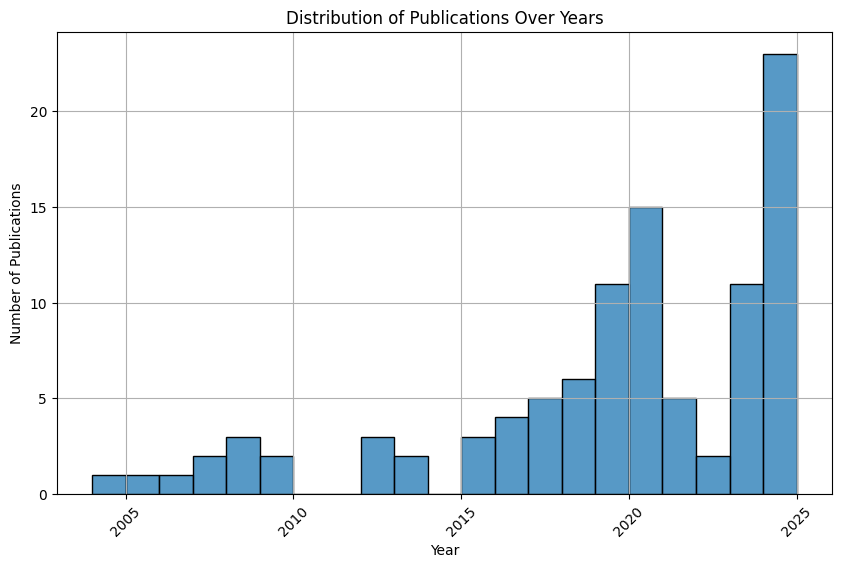

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=range(df['year'].min(), df['year'].max() + 1), kde=False)
plt.title('Distribution of Publications Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Top Authors by Number of Publications: A bar chart can display authors with the most publications.

/tmp/ipython-input-3993539346.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(authors), palette='viridis')


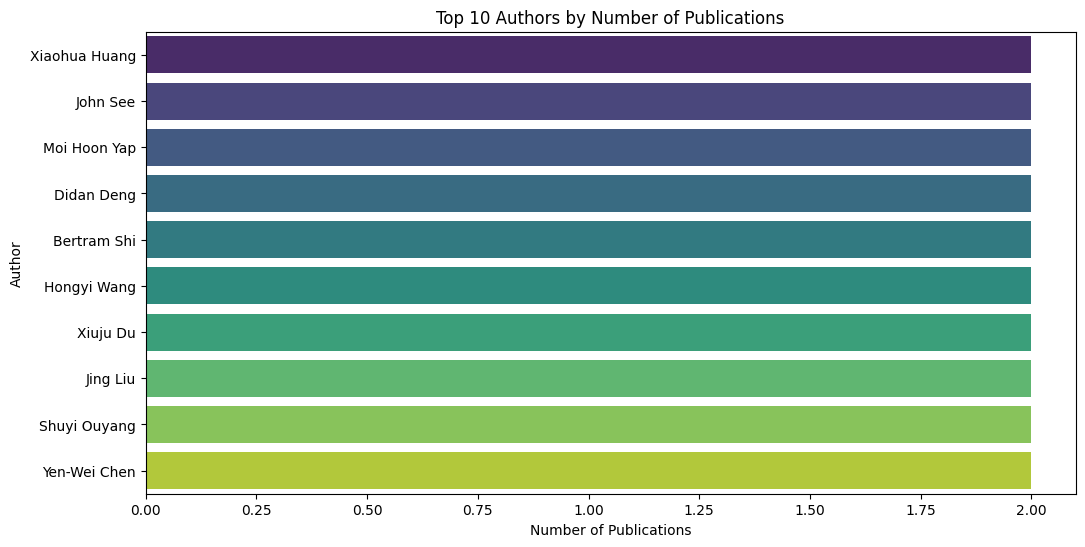

In [ ]:
from collections import Counter

# Flatten the list of authors and count occurrences
all_authors = [author for sublist in df['authors'] for author in sublist]
author_counts = Counter(all_authors)
top_authors = author_counts.most_common(10)

# Prepare data for plotting
authors, counts = zip(*top_authors)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(authors), palette='viridis')
plt.title('Top 10 Authors by Number of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.show()


## Primary Category Distribution: A bar chart to show the distribution of primary categories.

/tmp/ipython-input-3578191510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_category', data=df, order=df['primary_category'].value_counts().index, palette='coolwarm')


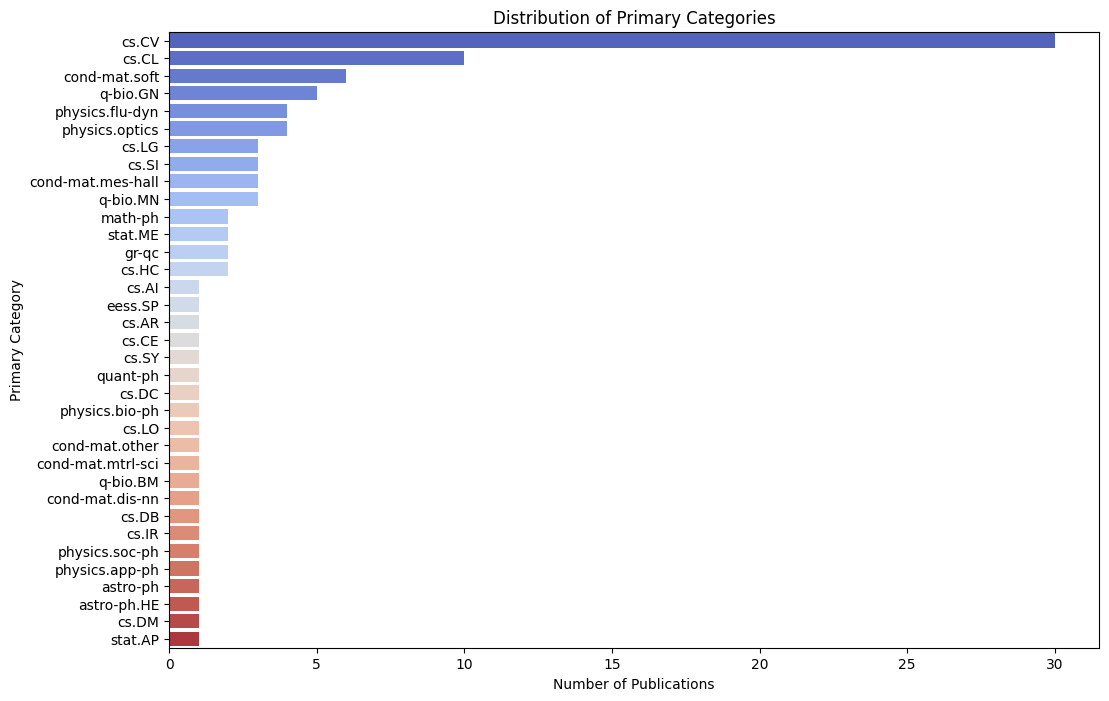

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='primary_category', data=df, order=df['primary_category'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Primary Categories')
plt.xlabel('Number of Publications')
plt.ylabel('Primary Category')
plt.show()


## DOI Availability: A pie chart to depict the proportion of papers with and without a DOI.

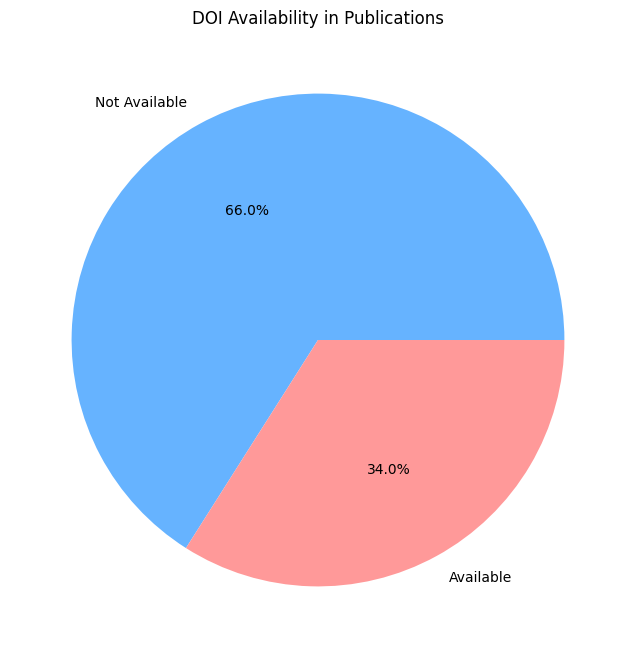

In [ ]:
doi_counts = df['doi'].apply(lambda x: 'Available' if x != 'N/A' else 'Not Available').value_counts()

plt.figure(figsize=(8, 8))
plt.pie(doi_counts, labels=doi_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('DOI Availability in Publications')
plt.show()


## Comments Word Cloud: A word cloud to visualize the most common words in the comments section.

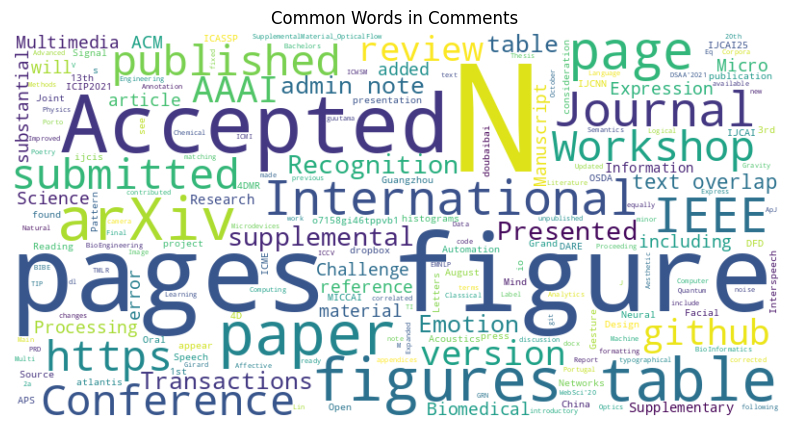

In [ ]:
from wordcloud import WordCloud

# Combine all comments into a single string
comments_text = ' '.join(df['comments'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Comments')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'submission_history' contains revision details

# Step 1: Create 'revision_count' column if it doesn't exist
if 'revision_count' not in df.columns:
    df['revision_count'] = df['submission_history'].apply(len)

# Step 2: Sort the DataFrame by 'revision_count' in descending order
sorted_df = df.sort_values(by='revision_count', ascending=False)

# Step 3: Select the top paper
top_paper = sorted_df.iloc[0]

# Display the top paper's details
print("Top Paper Based on Number of Revisions:")
print(f"Title: {top_paper['title']}")
print(f"Authors: {', '.join(top_paper['authors'])}")
print(f"Number of Revisions: {top_paper['revision_count']}")
print(f"DOI: {top_paper['doi']}")
print(f"Primary Category: {top_paper['primary_category']}")
print(f"Published Year: {top_paper['year']}")
print(f"Venue: {top_paper['venue']}")
print(f"Comments: {top_paper['comments']}")


Top Paper Based on Number of Revisions:
Title: Feature refinement: An expression-specific feature learning and fusion
  method for micro-expression recognition
Authors: Ling Zhou, Qirong Mao, Xiaohua Huang, Feifei Zhang, Zhihong Zhang
Number of Revisions: 0
DOI: N/A
Primary Category: cs.CV
Published Year: 2021
Venue: N/A
Comments: N/A


https://arxiv.org/pdf/2103.16937


# Part V Challenge: More Literature Database


1. **Semantic Scholar**: An AI-powered research tool that offers the Semantic Scholar Academic Graph API. This API provides data on authors, papers, citations, venues, and more, enabling comprehensive access to scholarly information

2. **CORE**: A service aggregating open access research papers from repositories and journals worldwide. CORE provides an API that allows access to a vast collection of open access content, facilitating large-scale text and data mining.

3. **OpenAlex**: An open catalog of scholarly papers, authors, institutions, venues, and concepts.OpenAlex offers a free API that enables access to a comprehensive index of scholarly works, serving as a successor to the Microsoft Academic Graph.

4. **Harvard Library APIs**: Harvard Library provides open access to its metadata through APIs like LibraryCloud, offering granular access to a large aggregation of bibliographic metadata.This can be useful for accessing a diverse range of academic content.

5. **PubTator**: An AI-powered literature resource that offers semantic and relation searches for key biomedical concepts.PubTator provides an API for accessing annotated biomedical literature, which can be valuable for research in the life sciences.
